<a href="https://colab.research.google.com/github/bryonie/Spatio_HW/blob/master/Bryonie_Spatio_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup Google Drive for pulling in files


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':"18DPGKwPOdUQMn2xsyZLI1B1VNGA0ALG1"})   
downloaded.GetContentFile('2046729_spatial.csv')
downloaded = drive.CreateFile({'id':"1WoYkI7EjCB-4b9_HmufNwyNbhjx_n7CO"})   
downloaded.GetContentFile('2046729_traj.csv') 
downloaded = drive.CreateFile({'id':"1IPs0suoPwl4HZZ8dnsNEA0ofyR5NTDcw"})   
downloaded.GetContentFile('CA_Counties_TIGER2016.shp') 
downloaded = drive.CreateFile({'id':"1dg5wM-rqqPAGWHNJlJiBFPdvUYf7a-C5"})   
downloaded.GetContentFile('CA_Counties_TIGER2016.dbf')
downloaded = drive.CreateFile({'id':"1eu6_XgzimKqO5EqqfrparchwclYpQVB5"})   
downloaded.GetContentFile('CA_Counties_TIGER2016.shx')
downloaded = drive.CreateFile({'id':"1f7qYlYRzmX1paCXT-19LPBxs0owydT8H"})   
downloaded.GetContentFile('CA_Counties_TIGER2016.sbx')
downloaded = drive.CreateFile({'id':"1P1sm-r0c2GSTpyNp3dSKQ1Cg5cIbh1FN"})   
downloaded.GetContentFile('CA_Counties_TIGER2016.sbn')

Imports and reading files

In [14]:
pip install pyshp
pip install geopandas

     |████████████████████████████████| 931kB 4.9MB/s 
     |████████████████████████████████| 14.7MB 53.0MB/s 
     |████████████████████████████████| 10.4MB 18.8MB/s 


In [18]:
import numpy as np
import pandas as pd
from matplotlib.dates import date2num, num2date
import datetime as datetime
import matplotlib .pyplot as plt
import shapefile as shp
import geopandas as gpd
from mpl_toolkits import mplot3d
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_acf
from scipy.spatial.distance import pdist, squareform
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

spatial_file = '2046729_spatial.csv'
county_shape = 'CA_Counties_TIGER2016.shp'
county_dbf = 'CA_Counties_TIGER2016.dbf'
county_shx = 'CA_Counties_TIGER2016.shx'
county_sbx = 'CA_Counties_TIGER2016.sbx'
county_sbn = 'CA_Counties_TIGER2016.sbn'

spatial_data = pd.read_csv(spatial_file)

spatial_data.head()

,Unnamed: 0,Unnamed: 0.1,name,capital,population,latitude,longitude,Virus X
0,0,0,Sierra,Downieville,3380,36.985898,-119.232078,5
1,1,1,Sacramento,Sacramento,1424415,38.573659,-121.487147,506
2,2,2,Santa Barbara,Santa Barbara,428655,34.423403,-119.704416,652
3,3,3,Calaveras,San Andreas,46127,38.231085,-120.619990,1
4,4,4,Ventura,Ventura,831587,34.265900,-119.258366,28


Normalizing Data (with comments)

In [5]:
normalized_dict = {
    "": ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
    "Unnamed: 0": [],
    "Unnamed: 0.1": [],
    "population": [],
    "latitude": [],
    "longitude": [],
    "Virus X": []
}

keys = list(normalized_dict.keys())
print(keys)

for key in keys:
  if(key != ''):
    normalized_dict[key].append(spatial_data[key].count())
    normalized_dict[key].append(spatial_data[key].mean())
    normalized_dict[key].append(spatial_data[key].std())
    normalized_dict[key].append(spatial_data[key].min())
    normalized_dict[key].append('25')
    normalized_dict[key].append('50')
    normalized_dict[key].append('75')
    normalized_dict[key].append(spatial_data[key].max())

# normalized_data = pd.DataFrame(normalized_dict)

normalized_data = spatial_data.describe()

normalized_data


['', 'Unnamed: 0', 'Unnamed: 0.1', 'population', 'latitude', 'longitude', 'Virus X']


,Unnamed: 0,Unnamed: 0.1,population,latitude,longitude,Virus X
count,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000
mean,28.500000,28.500000,6.072262e+05,37.612156,-120.734224,406.224138
std,16.886879,16.886879,1.446943e+06,2.258869,1.886696,1391.077457
min,0.000000,0.000000,1.222000e+03,32.718834,-123.965971,1.000000
25%,14.250000,14.250000,4.879500e+04,36.530736,-122.102211,5.250000
50%,28.500000,28.500000,1.809790e+05,37.814835,-120.905185,29.500000
75%,42.750000,42.750000,5.155448e+05,39.150608,-119.781361,171.750000
max,57.000000,57.000000,1.036385e+07,41.774326,-115.569962,9479.000000


Plot time!

Question 2.1

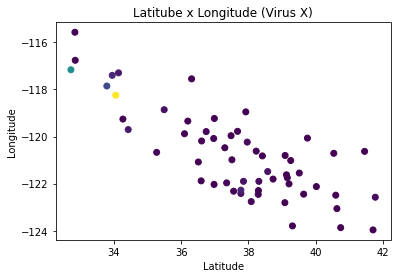

In [5]:
# Question 2.1
plt.scatter(
    spatial_data["latitude"],
    spatial_data["longitude"],
    c=spatial_data["Virus X"]
)
plt.title('Latitube x Longitude (Virus X)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Question 2.2

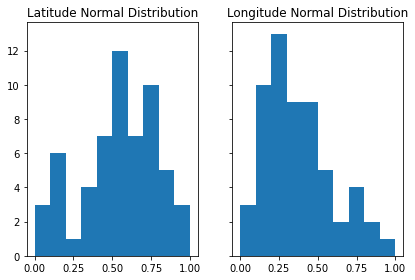

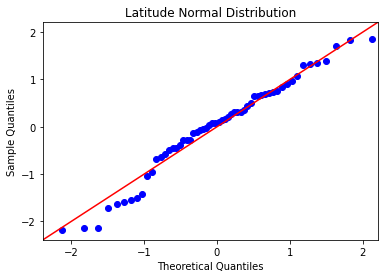

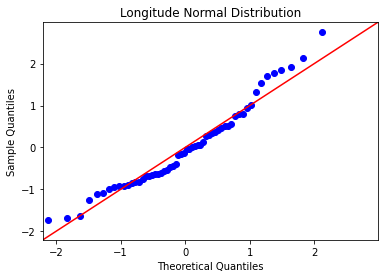

In [185]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

def Normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

latitude = Normalize(spatial_data["latitude"])
longitude = Normalize(spatial_data["longitude"])

# fig.suptitle("Latitude vs Longitude")
axs[0].set_title("Latitude Normal Distribution")
axs[0].hist(latitude, label="Latitude")
axs[1].set_title("Longitude Normal Distribution")
axs[1].hist(longitude, label="Longitude")


sm.qqplot(latitude,fit=True,line='45')
plt.title("Latitude Normal Distribution")
sm.qqplot(longitude,fit=True,line='45')
plt.title("Longitude Normal Distribution")
plt.show()



Question 2.3

In [186]:
from sklearn.preprocessing import normalize
lag = 8
tol = 0.2

spatial_data2 = spatial_data
spatial_data2["NDvirus"] = normalize(spatial_data2["Virus X"])

P1 = np.array(spatial_data2[['latitude', 'longitude', 'NDvirus']])
P2 = np.array(spatial_data[['latitude', 'longitude', 'Virus X']])
# P[:,2]

pwdist = squareform(pdist(P1[:,:2]))
pwdist2 = squareform(pdist(P2[:,:2]))

i,j = np.where((pwdist >= lag - tol) & (pwdist < lag + tol)) 
x,y = np.where((pwdist2 >= lag - tol) & (pwdist2 < lag + tol)) 

indicies = np.c_[i,j][np.where(j > i)]
indicies2 = np.c_[x,y][np.where(y > x)]
# plt.figure()

# print(P[indicies[:,1],0])

plt.scatter(P1[indicies[:,0],2],P1[indicies[:,1],2])
# plt.scatter(P2[indicies2[:,0],2],P2[indicies2[:,1],2])
# plt.scatter(P2[indicies2[:,1],2],P2[indicies2[:,1],2])
# print(P[indicies[:,0],1])

plot_acf(spatial_data['latitude'])
plot_acf(spatial_data['longitude'])
# plot_acf(P[indicies[:,1],0])
# plot_acf(P[indicies[:,1],1])
# plot_acf(P[:,1])


ValueError: ignored

Question 2.4

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')


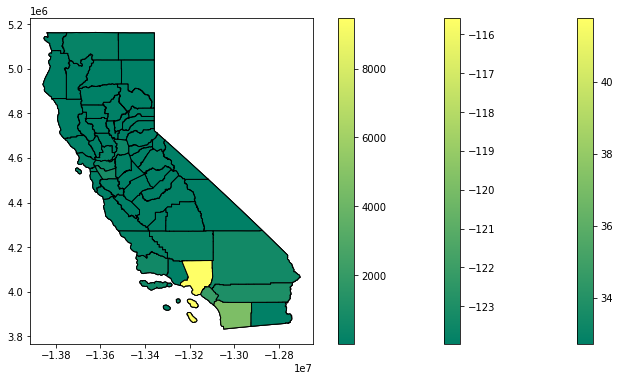

<Figure size 432x288 with 0 Axes>

In [37]:
cali = shp.Reader(county_shape)
fig, ax = plt.subplots(figsize=(14, 6))
# cali.shapeRecords()

plt.figure()
# for shape in cali.shapeRecords():
#     x = [i[0] for i in shape.shape.points[:]]
#     y = [i[1] for i in shape.shape.points[:]]
#     plt.plot(x,y)


geo_cali = gpd.read_file(county_shape)

print(geo_cali.columns)

# print(geo_cali["NAME"])
# for col in geo_cali.columns:
#   print(col)
#   print(geo_cali[col])

# for col in geo_cali.columns.drop('geometry'):
#   geo_cali.plot(column=col,categorical=True,legend=True,ax=ax, edgecolor='k')

geo_cali['latitude'] = spatial_data['latitude']
geo_cali['longitude'] = spatial_data['longitude']
geo_cali['virus'] = spatial_data['Virus X']

geo_cali.plot(column='latitude',cmap="summer",legend=True,ax=ax, edgecolor='k')
geo_cali.plot(column='longitude',cmap="summer",legend=True,ax=ax, edgecolor='k')
geo_cali.plot(column='virus',cmap="summer",legend=True,ax=ax, edgecolor='k')
# geo_cali.plot(column='NAME',categorical=True,legend=True,ax=ax, edgecolor='k')

plt.show()

Question 2.5

Question 2.6

Question 2.7

Question 2.8